# HomeWork 8
**DeadLine : 23:59 29 Aban 1400**

**Total points : 100pts**

# 1. Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Make your costome dataset   
 **یادآوری:** این بلوک فقط یکبار اجرا شود تا دیتاست در گوگل درایو ذخیره شود
 از دفعه دوم نیازی به اجرای آن بلوک نیست
 

## 2.1. Download dataset using google scraping

download and install google scraping tools:

In [ ]:
!git clone https://github.com/Joeclinton1/google-images-download.git
!cd /content/google-images-download/ && python setup.py install

costom dataset config:

In [ ]:
!echo '{"Records": [{"keywords": "car","limit": 60,"size": "medium","print_urls": true},{"keywords": "bird","limit": 60,"size": "medium","print_urls": true},{"keywords": "Leopard","limit": 60,"size": "medium","print_urls": true},{"keywords": "cat","limit": 60,"size": "medium","print_urls": true},{"keywords": "dog","limit": 60,"size": "medium","print_urls": true}]}' > dataset.json

download 40-50 image for each category
maybe take 2 or 3 minute ...

In [ ]:
!googleimagesdownload -cf dataset.json

## 2.2 Splite data To train set && test set

In [ ]:
import os
import shutil
categories = ['Leopard', 'bird', 'car', 'cat', 'dog']

os.makedirs('./test/')
for category in categories:
    os.makedirs('./test/'+category)
os.rename('./downloads', './train')

In [ ]:
import os
import shutil

categories = ['Leopard', 'bird', 'car', 'cat', 'dog']
for category in categories:
    src='./train/'+category
    dest='./test/'+category
    src_files = os.listdir(src)
    print(len(src_files))
    i=0
    for file_name in src_files:
        if i > (0.2*(len(src_files))):
            break
        full_file_name = os.path.join(src, file_name)
        if os.path.isfile(full_file_name):
            shutil.move(full_file_name, dest)
        i+=1
        


In [ ]:
for category in categories:
    src='./train/'+category
    dest='./test/'+category
    print(category, 'test imagess: ' ,len(os.listdir(src)))
    print(category, 'test images: ' ,len(os.listdir(dest)))


## 2.2. Copy Training data to Google Drive

In [ ]:
import os
import shutil

destination='/content/drive/MyDrive/HW7_Dataset/'
if not os.path.isdir(destination):
    os.makedirs(destination)
shutil.move('./train/', destination)
shutil.move('./test/', destination)


In [ ]:
for category in categories:
    src=destination+'./train/'+category
    dest=destination+'./test/'+category
    print(category, 'test imagess: ' ,len(os.listdir(src)))
    print(category, 'test images: ' ,len(os.listdir(dest)))


# 3. Load Dataset From Google Drive

In [2]:
categories = ['Leopard', 'bird', 'car', 'cat', 'dog']
import os
import shutil

destination='/content/drive/MyDrive/HW7_Dataset/'
if not os.path.isdir(destination):
    os.makedirs(destination)
os.system('cp -r '+destination+'train/'+ ' ./')
os.system('cp -r '+destination+'test/'+ ' ./')


0

In [3]:
categories = ['Leopard', 'bird', 'car', 'cat', 'dog']
for category in categories:
    src='./train/'+category
    dest='./test/'+category
    print(category, 'train images: ' ,len(os.listdir(src)))
    print(category, 'test images: ' ,len(os.listdir(dest)))


Leopard train images:  47
Leopard test images:  13
bird train images:  47
bird test images:  13
car train images:  47
car test images:  13
cat train images:  47
cat test images:  13
dog train images:  47
dog test images:  13


# 4. Generator

In [4]:
from keras.preprocessing.image import ImageDataGenerator
batch_size = 16
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/HW7_Dataset/train', batch_size=batch_size, save_format='jpg')

validation_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/HW7_Dataset/test', batch_size=batch_size, save_format='jpg')


Found 217 images belonging to 5 classes.
Found 59 images belonging to 5 classes.


In [5]:
x, y=train_generator.__getitem__(1)
print(x.shape)
print(y.shape)

(16, 256, 256, 3)
(16, 5)


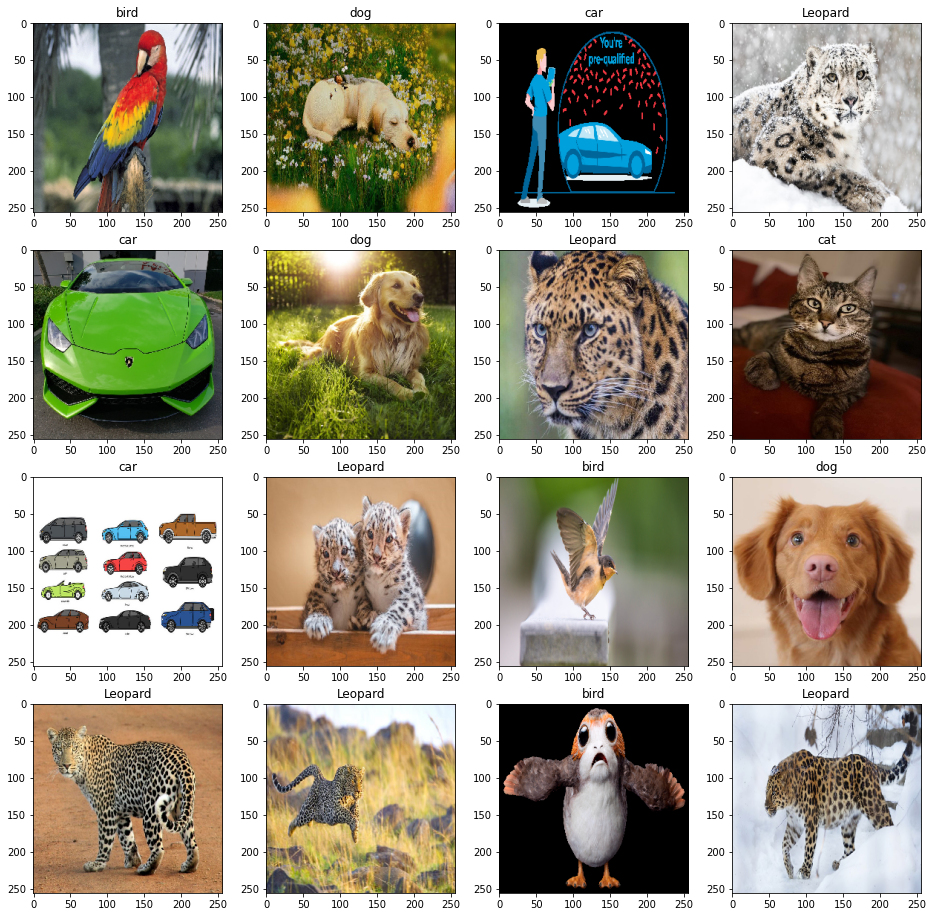

In [6]:
from matplotlib import pyplot as plt
import numpy as np
categories = ['Leopard', 'bird', 'car', 'cat', 'dog']
x, y=train_generator.__getitem__(5)

def plot_img(x_train, y_train):
    from matplotlib import pyplot as plt
    fig=plt.figure(figsize=(16, 16))
    columns = 4
    rows = 4
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        img = x_train[i-1]
        plt.imshow(img)
        plt.title(categories[np.argmax(y[i-1])])
    plt.show()
plot_img(x, y)


# Part A: build and train model without using data augmentation

In [57]:
import keras
def build_model(model_name):
    model = keras.models.Sequential(name=model_name,
                                    layers=[keras.layers.Input(shape=(256, 256, 3)),
                                            keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='elu'),
                                            keras.layers.MaxPooling2D(pool_size=(3, 3)),
                                            keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='elu'),
                                            keras.layers.MaxPooling2D(pool_size=(3, 3)),
                                            keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='elu'),
                                            keras.layers.MaxPooling2D(pool_size=(3, 3)),
                                            keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='elu'),
                                            keras.layers.MaxPooling2D(pool_size=(3, 3)),
                                            keras.layers.Flatten(),
                                            keras.layers.Dense(128, activation='elu'),
                                            keras.layers.Dense(5, activation='softmax')])
    return model

In [58]:
import tensorflow

model = build_model('part_1')
loss = keras.losses.categorical_crossentropy
optimizer = tensorflow.keras.optimizers.Adam()
BATCH_SIZE = 32
EPOCHS = 40
model.summary()

Model: "part_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_76 (Conv2D)          (None, 252, 252, 32)      2432      
                                                                 
 max_pooling2d_76 (MaxPoolin  (None, 84, 84, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_77 (Conv2D)          (None, 80, 80, 32)        25632     
                                                                 
 max_pooling2d_77 (MaxPoolin  (None, 26, 26, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_78 (Conv2D)          (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d_78 (MaxPoolin  (None, 7, 7, 32)         0    

In [9]:
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
model.fit(train_generator, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=validation_generator)

Epoch 1/30
 9/14 [==================>...........] - ETA: 0s - loss: 1.6124 - accuracy: 0.2222

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


14/14 [==============================] - 14s 303ms/step - loss: 1.5669 - accuracy: 0.2581 - val_loss: 1.3356 - val_accuracy: 0.3898
Epoch 2/30
14/14 [==============================] - 4s 254ms/step - loss: 1.4486 - accuracy: 0.3594 - val_loss: 1.3528 - val_accuracy: 0.3559
Epoch 3/30
14/14 [==============================] - 4s 255ms/step - loss: 1.3357 - accuracy: 0.4009 - val_loss: 1.2111 - val_accuracy: 0.4407
Epoch 4/30
14/14 [==============================] - 4s 259ms/step - loss: 1.1616 - accuracy: 0.5300 - val_loss: 1.1140 - val_accuracy: 0.4915
Epoch 5/30
14/14 [==============================] - 4s 257ms/step - loss: 1.0623 - accuracy: 0.5899 - val_loss: 1.1971 - val_accuracy: 0.4746
Epoch 6/30
14/14 [==============================] - 4s 257ms/step - loss: 1.1120 - accuracy: 0.4839 - val_loss: 1.1517 - val_accuracy: 0.4915
Epoch 7/30
14/14 [==============================] - 4s 256ms/step - loss: 0.9582 - accuracy: 0.6037 - val_loss: 1.1171 - val_accuracy: 0.4746
Epoch 8/30
14/14

In [10]:
model_1.evaluate(validation_generator, batch_size=BATCH_SIZE)

3/4 [=====================>........] - ETA: 0s - loss: 1.3744 - accuracy: 0.5625

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


4/4 [==============================] - 1s 183ms/step - loss: 1.5046 - accuracy: 0.5593


[1.5046100616455078, 0.5593220591545105]

# Part B: train model using data augmentation

In [60]:
batch_size = 16
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=40,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/HW7_Dataset/train', batch_size=batch_size, save_format='jpg')

validation_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/HW7_Dataset/test', batch_size=batch_size, save_format='jpg')

Found 217 images belonging to 5 classes.
Found 59 images belonging to 5 classes.


In [52]:
model = build_model('part_2')
loss = keras.losses.categorical_crossentropy
optimizer = tensorflow.keras.optimizers.Adam()
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
model.fit(train_generator, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/40
14/14 [==============================] - 8s 499ms/step - loss: 1.6507 - accuracy: 0.2304 - val_loss: 1.5397 - val_accuracy: 0.3729
Epoch 2/40
14/14 [==============================] - 7s 461ms/step - loss: 1.4803 - accuracy: 0.3548 - val_loss: 1.3671 - val_accuracy: 0.4576
Epoch 3/40
14/14 [==============================] - 7s 468ms/step - loss: 1.4344 - accuracy: 0.4286 - val_loss: 1.4311 - val_accuracy: 0.2881
Epoch 4/40
14/14 [==============================] - 7s 466ms/step - loss: 1.3405 - accuracy: 0.4608 - val_loss: 1.2924 - val_accuracy: 0.3729
Epoch 5/40
14/14 [==============================] - 7s 470ms/step - loss: 1.3030 - accuracy: 0.4378 - val_loss: 1.2217 - val_accuracy: 0.4237
Epoch 6/40
14/14 [==============================] - 7s 465ms/step - loss: 1.2083 - accuracy: 0.5023 - val_loss: 1.1041 - val_accuracy: 0.5424
Epoch 7/40
14/14 [==============================] - 6s 463ms/step - loss: 1.2377 - accuracy: 0.4424 - val_loss: 1.3097 - val_accuracy: 0.4407
Epoch 

# Part C: build and train model with dropout

In [61]:
def build_model(model_name, dropout_prob):
    model = keras.models.Sequential(name=model_name,
                                    layers=[keras.layers.Input(shape=(256, 256, 3)),
                                            keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='elu'),
                                            keras.layers.MaxPooling2D(pool_size=(3, 3)),
                                            keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='elu'),
                                            keras.layers.MaxPooling2D(pool_size=(3, 3)),
                                            keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='elu'),
                                            keras.layers.MaxPooling2D(pool_size=(3, 3)),
                                            keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='elu'),
                                            keras.layers.MaxPooling2D(pool_size=(3, 3)),
                                            keras.layers.Flatten(),
                                            keras.layers.Dropout(dropout_prob),
                                            keras.layers.Dense(128, activation='elu'),
                                            keras.layers.Dropout(dropout_prob),
                                            keras.layers.Dense(5, activation='softmax')])
    return model

In [63]:
model = build_model('part_3_1', .5)
loss = keras.losses.categorical_crossentropy
optimizer = tensorflow.keras.optimizers.Adam()
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
model.fit(train_generator, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=validation_generator)

Epoch 1/40
 8/14 [================>.............] - ETA: 2s - loss: 1.7250 - accuracy: 0.2066

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


14/14 [==============================] - 8s 493ms/step - loss: 1.7310 - accuracy: 0.2212 - val_loss: 1.5905 - val_accuracy: 0.2712
Epoch 2/40
14/14 [==============================] - 6s 458ms/step - loss: 1.5513 - accuracy: 0.2811 - val_loss: 1.4551 - val_accuracy: 0.4746
Epoch 3/40
14/14 [==============================] - 6s 460ms/step - loss: 1.5548 - accuracy: 0.3041 - val_loss: 1.2958 - val_accuracy: 0.5085
Epoch 4/40
14/14 [==============================] - 6s 457ms/step - loss: 1.5436 - accuracy: 0.3088 - val_loss: 1.4451 - val_accuracy: 0.3559
Epoch 5/40
14/14 [==============================] - 6s 458ms/step - loss: 1.5227 - accuracy: 0.3318 - val_loss: 1.3937 - val_accuracy: 0.4237
Epoch 6/40
14/14 [==============================] - 6s 459ms/step - loss: 1.4379 - accuracy: 0.3687 - val_loss: 1.3783 - val_accuracy: 0.3390
Epoch 7/40
14/14 [==============================] - 6s 458ms/step - loss: 1.3907 - accuracy: 0.3641 - val_loss: 1.4381 - val_accuracy: 0.3898
Epoch 8/40
14/14 

In [64]:
model = build_model('part_3_2', .7)
loss = keras.losses.categorical_crossentropy
optimizer = tensorflow.keras.optimizers.Adam()
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
model.fit(train_generator, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=validation_generator)

Epoch 1/40
 1/14 [=>............................] - ETA: 15s - loss: 1.8206 - accuracy: 0.0625

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


14/14 [==============================] - 8s 496ms/step - loss: 1.7721 - accuracy: 0.1659 - val_loss: 1.6188 - val_accuracy: 0.2203
Epoch 2/40
14/14 [==============================] - 7s 467ms/step - loss: 1.6865 - accuracy: 0.2074 - val_loss: 1.5723 - val_accuracy: 0.2373
Epoch 3/40
14/14 [==============================] - 7s 468ms/step - loss: 1.6235 - accuracy: 0.2350 - val_loss: 1.5007 - val_accuracy: 0.3051
Epoch 4/40
14/14 [==============================] - 7s 470ms/step - loss: 1.6228 - accuracy: 0.2396 - val_loss: 1.5132 - val_accuracy: 0.3220
Epoch 5/40
14/14 [==============================] - 7s 472ms/step - loss: 1.6595 - accuracy: 0.2258 - val_loss: 1.4152 - val_accuracy: 0.4576
Epoch 6/40
14/14 [==============================] - 7s 463ms/step - loss: 1.5449 - accuracy: 0.2949 - val_loss: 1.3969 - val_accuracy: 0.3559
Epoch 7/40
14/14 [==============================] - 6s 458ms/step - loss: 1.5750 - accuracy: 0.3180 - val_loss: 1.3638 - val_accuracy: 0.4746
Epoch 8/40
14/14 

In [65]:
model = build_model('part_3_2', .2)
loss = keras.losses.categorical_crossentropy
optimizer = tensorflow.keras.optimizers.Adam()
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
model.fit(train_generator, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=validation_generator)

Epoch 1/40
 9/14 [==================>...........] - ETA: 2s - loss: 1.6760 - accuracy: 0.2014

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


14/14 [==============================] - 8s 488ms/step - loss: 1.6645 - accuracy: 0.2166 - val_loss: 1.6198 - val_accuracy: 0.1864
Epoch 2/40
14/14 [==============================] - 6s 462ms/step - loss: 1.5641 - accuracy: 0.3134 - val_loss: 1.4271 - val_accuracy: 0.4915
Epoch 3/40
14/14 [==============================] - 6s 464ms/step - loss: 1.5013 - accuracy: 0.3687 - val_loss: 1.2798 - val_accuracy: 0.4068
Epoch 4/40
14/14 [==============================] - 6s 462ms/step - loss: 1.3911 - accuracy: 0.3871 - val_loss: 1.1691 - val_accuracy: 0.4237
Epoch 5/40
14/14 [==============================] - 6s 477ms/step - loss: 1.2754 - accuracy: 0.4101 - val_loss: 1.4306 - val_accuracy: 0.4068
Epoch 6/40
14/14 [==============================] - 6s 463ms/step - loss: 1.2560 - accuracy: 0.4470 - val_loss: 1.3350 - val_accuracy: 0.4407
Epoch 7/40
14/14 [==============================] - 6s 461ms/step - loss: 1.1794 - accuracy: 0.4747 - val_loss: 1.1726 - val_accuracy: 0.5593
Epoch 8/40
14/14 

# Other metrics

In [66]:
from sklearn.metrics import classification_report
y_pred = np.argmax(model.predict(validation_generator), axis=1)
print(classification_report(validation_generator.classes, y_pred, target_names=categories))

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

     Leopard       0.22      0.17      0.19        12
        bird       0.00      0.00      0.00        12
         car       0.17      0.40      0.24        10
         cat       0.10      0.08      0.09        12
         dog       0.07      0.08      0.07        13

    accuracy                           0.14        59
   macro avg       0.11      0.15      0.12        59
weighted avg       0.11      0.14      0.11        59



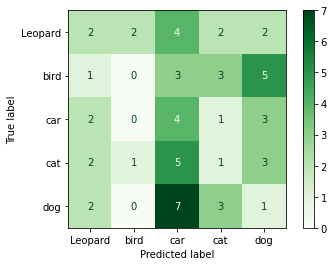

In [67]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(validation_generator.classes, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
disp.plot(cmap=plt.cm.Greens)
plt.show()